In [22]:
%pylab inline
%matplotlib inline
import numpy as np
from numpy.random import shuffle
from sklearn import preprocessing
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [23]:
import wget

# load data from file
# BN=loadtxt('./data/banknote-authentication')
CBD=loadtxt('dataset2.txt')
print(type(CBD))
shuffle(CBD)
# print("old Bank Note Data: ")
# print(BN)
# print("new Bank Note Data: ")
# # shuffle(BN)
# print(BN)

# load data from file

<class 'numpy.ndarray'>


In [24]:
class_labels_CBD =CBD[:,-1]

In [25]:
class_labels_CBD= [ int(x) for x in class_labels_CBD ]
class_labels_CBD = np.asarray(class_labels_CBD)

In [26]:
print(class_labels_CBD)
print(len(class_labels_CBD))

[1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0
 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1
 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1
 0 1 0 1 0 0 1 1 0 0 1 0 

In [27]:
data_CBD=CBD[:,0:-1]
print(data_CBD)

# pca_CBD = PCA(n_components=2)
# pca_CBD.fit(data_CBD)
# data_CBD = pca_CBD.transform(data_CBD) 

# print("scaled data: ")
print(data_CBD)


[[-0.01428744 -0.36314785 -0.01431627  0.0740798   0.55440818]
 [ 0.26467975  0.23864897  0.10712325  1.55550872  0.66039833]
 [ 0.08676525  0.32294399  0.09809743  1.30260771  0.98290105]
 ..., 
 [ 0.04665798  0.12162021  0.12410003  5.81189644  0.33605105]
 [ 0.14638659 -0.08622061  0.09318823  0.49053819  0.60706896]
 [ 0.36328288  0.64621705  0.08290877  2.47620853  1.53474831]]
[[-0.01428744 -0.36314785 -0.01431627  0.0740798   0.55440818]
 [ 0.26467975  0.23864897  0.10712325  1.55550872  0.66039833]
 [ 0.08676525  0.32294399  0.09809743  1.30260771  0.98290105]
 ..., 
 [ 0.04665798  0.12162021  0.12410003  5.81189644  0.33605105]
 [ 0.14638659 -0.08622061  0.09318823  0.49053819  0.60706896]
 [ 0.36328288  0.64621705  0.08290877  2.47620853  1.53474831]]


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [34]:
n_range_CBD = range(1,50)
n_scores_CBD = list()
for n in n_range_CBD:
    mlp_CBD = MLPClassifier(activation = 'logistic', solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(n, n, n ))
    scores_CBD = cross_val_score(mlp_CBD,data_CBD,class_labels_CBD, cv=5, scoring = "accuracy")
    n_scores_CBD.append(scores_CBD.mean())
print(n_scores_CBD)

[0.71200626986025206, 0.70653850753408276, 0.72616613136524644, 0.73707375200738035, 0.71379340781995637, 0.73855522716142186, 0.70296622475826021, 0.72623133563399056, 0.72450883247343423, 0.72795298459015279, 0.74772539606610411, 0.72973784467147296, 0.73691259211170723, 0.73337419277684768, 0.75467434881151696, 0.76572533342444848, 0.75477172811243609, 0.76387612327877807, 0.7422863919545335, 0.71892674912586418, 0.75834173300987451, 0.73527138073598253, 0.73503177640345785, 0.74228582248493757, 0.75673241193152696, 0.73329432466600597, 0.74048487488752968, 0.7314925228642043, 0.74946199359916177, 0.75477058917324402, 0.73504786391954524, 0.74946227833395973, 0.73332507602419117, 0.7315399312080727, 0.74046850263664421, 0.75115146752314899, 0.74220623910889394, 0.75662093825810639, 0.74600203870115367, 0.75121467864830682, 0.73166806186717692, 0.74234988781448963, 0.75475478639195459, 0.74053171376180216, 0.74407267570984392, 0.74046907210624036, 0.72803256796619631, 0.7387790287126

In [37]:

def find_opt_nodes(n_scores):
    max_num = max(n_scores)
    for i in range(len(n_scores)):
        if n_scores[i] == max_num:
            print("number nodes: ", i+1)
            print("accuracy: ", max_num*100, "%")
            print("accuracy: ", round(max_num*100,2),"%")
            return i+1
        

n_CBD = find_opt_nodes(n_scores_CBD)

number nodes:  16
accuracy:  76.5725333424 %
accuracy:  76.57 %


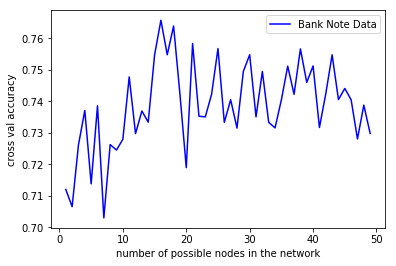

In [36]:
import matplotlib.pyplot as plt

figure()
figsize(8,8)
plt.plot(n_range_CBD,n_scores_CBD,"b", label ="Bank Note Data")
plt.xlabel("number of possible nodes in the network")
plt.ylabel("cross val accuracy")
legend(loc = "best")
